# Used Car Price Prediction Model

Used Car Price Prediction

This Python script focuses on predicting the resale value of used cars using machine learning models. The goal of this project is to build an accurate predictive model that can estimate the price of a used car based on various features such as brand, model, year, mileage, engine size, and other relevant attributes.

The project involves:
1. Data cleaning and preprocessing to handle missing values and outliers.
2. Feature engineering to create meaningful variables from the existing dataset.
3. Implementation of several machine learning models to predict car prices.
4. Model comparison to evaluate the performance of different algorithms.

This project aims to provide valuable insights for consumers and dealers in the used car market by offering an efficient method to estimate car prices based on key attributes.



# Import of Data Files & Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
small_all = pd.read_csv('E:\Queens Academic\Done Subjects\Machine Learning & AI\Individual Assignment 03\pc2_small_train_data_v1.csv')
test_all = pd.read_csv('E:\Queens Academic\Done Subjects\Machine Learning & AI\Individual Assignment 03\pc3_test_without_response_variable_v1.csv')

In [2]:
small_all.head(5)

,price,back_legroom,body_type,city,city_fuel_economy,engine_cylinders,engine_displacement,engine_type,exterior_color,front_legroom,...,model_name,power,torque,transmission_display,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
0,46699.0,38 in,SUV / Crossover,Merriam,31,V6 Hybrid,3500,V6 Hybrid,Eminent White Pearl,44.1 in,...,RX Hybrid,NaN,NaN,Continuously Variable Transmission,450h AWD,AWD,All-Wheel Drive,109.8 in,74.6 in,2017
1,15385.0,39 in,SUV / Crossover,Sacramento,15,V8 Flex Fuel Vehicle,5300,V8 Flex Fuel Vehicle,Quicksilver Metallic,41.3 in,...,Yukon,"320 hp @ 5,400 RPM","335 lb-ft @ 4,000 RPM",Automatic,SLE,4X2,4X2,116 in,79 in,2012
2,12495.0,34.7 in,Sedan,Greeley,24,I4,2400,I4,Ebony Black,45.5 in,...,Optima,"200 hp @ 6,300 RPM","186 lb-ft @ 4,250 RPM",6-Speed Automatic,EX,FWD,Front-Wheel Drive,110 in,72 in,2013
3,19995.0,36.7 in,SUV / Crossover,Patchogue,27,I3,1000,I3,None,42.9 in,...,EcoSport,"123 hp @ 6,000 RPM","125 lb-ft @ 3,500 RPM",6-Speed Automatic,SE FWD,FWD,Front-Wheel Drive,99.2 in,81 in,2019
4,14295.0,35.6 in,Sedan,Hartford,24,I4,2400,I4,Sangria,45.5 in,...,Optima,"185 hp @ 6,000 RPM","178 lb-ft @ 4,000 RPM",Automatic,LX FWD,FWD,Front-Wheel Drive,110.4 in,73.2 in,2019


In [3]:
small_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 100000 non-null  float64
 1   back_legroom          99993 non-null   object 
 2   body_type             100000 non-null  object 
 3   city                  100000 non-null  object 
 4   city_fuel_economy     100000 non-null  int64  
 5   engine_cylinders      99999 non-null   object 
 6   engine_displacement   100000 non-null  int64  
 7   engine_type           99999 non-null   object 
 8   exterior_color        99999 non-null   object 
 9   front_legroom         99993 non-null   object 
 10  fuel_tank_volume      99993 non-null   object 
 11  fuel_type             99999 non-null   object 
 12  height                99993 non-null   object 
 13  highway_fuel_economy  100000 non-null  int64  
 14  horsepower            100000 non-null  int64  
 15  i

# Cleaning the Data and Converting Categorical Numbers in to Numeric

In [4]:
import pandas as pd
import numpy as np

# Function to clean and convert columns to numeric
def clean_and_convert(df, columns):
    for column in columns:
        if column in df.columns:
            # Ensure all values are strings
            df[column] = df[column].astype(str)
            # Replace '--' with NaN
            df[column] = df[column].replace('--', np.nan)
            # Remove ' in' and convert to float
            df[column] = df[column].str.replace(' in', '').astype(float)
    return df

# List of columns to process
columns_to_process = ['front_legroom', 'back_legroom', 'height', 'length', 'wheelbase', 'width']

# Apply the cleaning function to each DataFrame

small_all = clean_and_convert(small_all, columns_to_process)
test_all = clean_and_convert(test_all, columns_to_process)

# Display the updated DataFrames (optional)
print(small_all.head())

     price  back_legroom        body_type        city  city_fuel_economy  \
0  46699.0          38.0  SUV / Crossover     Merriam                 31   
1  15385.0          39.0  SUV / Crossover  Sacramento                 15   
2  12495.0          34.7            Sedan     Greeley                 24   
3  19995.0          36.7  SUV / Crossover   Patchogue                 27   
4  14295.0          35.6            Sedan    Hartford                 24   

       engine_cylinders  engine_displacement           engine_type  \
0             V6 Hybrid                 3500             V6 Hybrid   
1  V8 Flex Fuel Vehicle                 5300  V8 Flex Fuel Vehicle   
2                    I4                 2400                    I4   
3                    I3                 1000                    I3   
4                    I4                 2400                    I4   

         exterior_color  front_legroom  ... model_name               power  \
0   Eminent White Pearl           44.1  ... 

Converting text based column with features name in to numeric column where instead of text name we would just count the options avaiable for that car

In [5]:

import ast

# Function to count the number of features in each row
def count_features(features_str):
    try:
        # Convert string representation of list to an actual list
        features_list = ast.literal_eval(features_str)
        # Return the length of the list
        return len(features_list)
    except (ValueError, SyntaxError):
        return 0

# Apply the function to the 'major_options' column in small_all, ignoring NaN values
small_all['major_options_count'] = small_all['major_options'].dropna().apply(count_features)

# For rows that were NaN, set 'Feature Count' to NaN to ignore them
small_all['major_options_count'] = small_all['major_options_count'].replace(0, pd.NA)

# Apply the function to the 'major_options' column in test_all, ignoring NaN values
test_all['major_options_count'] = test_all['major_options'].dropna().apply(count_features)

# For rows that were NaN, set 'Feature Count' to NaN to ignore them
test_all['major_options_count'] = test_all['major_options_count'].replace(0, pd.NA)




In [6]:
small_all.head(5)

,price,back_legroom,body_type,city,city_fuel_economy,engine_cylinders,engine_displacement,engine_type,exterior_color,front_legroom,...,power,torque,transmission_display,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,major_options_count
0,46699.0,38.0,SUV / Crossover,Merriam,31,V6 Hybrid,3500,V6 Hybrid,Eminent White Pearl,44.1,...,NaN,NaN,Continuously Variable Transmission,450h AWD,AWD,All-Wheel Drive,109.8,74.6,2017,12.0
1,15385.0,39.0,SUV / Crossover,Sacramento,15,V8 Flex Fuel Vehicle,5300,V8 Flex Fuel Vehicle,Quicksilver Metallic,41.3,...,"320 hp @ 5,400 RPM","335 lb-ft @ 4,000 RPM",Automatic,SLE,4X2,4X2,116.0,79.0,2012,9.0
2,12495.0,34.7,Sedan,Greeley,24,I4,2400,I4,Ebony Black,45.5,...,"200 hp @ 6,300 RPM","186 lb-ft @ 4,250 RPM",6-Speed Automatic,EX,FWD,Front-Wheel Drive,110.0,72.0,2013,5.0
3,19995.0,36.7,SUV / Crossover,Patchogue,27,I3,1000,I3,None,42.9,...,"123 hp @ 6,000 RPM","125 lb-ft @ 3,500 RPM",6-Speed Automatic,SE FWD,FWD,Front-Wheel Drive,99.2,81.0,2019,6.0
4,14295.0,35.6,Sedan,Hartford,24,I4,2400,I4,Sangria,45.5,...,"185 hp @ 6,000 RPM","178 lb-ft @ 4,000 RPM",Automatic,LX FWD,FWD,Front-Wheel Drive,110.4,73.2,2019,5.0


Dropping columns which are duplicates or providing the same data in different format to reduce the correlation among the variables, also removing latitude and longitude as we would be using the city as a geographical feature

In [7]:
columns_to_drop = ['engine_type', 'major_options', 'latitude', 'longitude', 'wheel_system_display']

# Drop columns from each DataFrame

small_all = small_all.drop(columns=columns_to_drop)

test_all = test_all.drop(columns=columns_to_drop)

We are removing non-numeric characters and text in one step, including extracting the number of seats from entries like '5 seats' in the seating arrangement column, removing units such as 'gal' from the fuel tank volume column, and eliminating signs or text from the engine cylinder column to retain only numeric values for accurate analysis

In [8]:
def clean_specific_columns(df):
    if 'engine_cylinders' in df.columns:
        df['engine_cylinders'] = df['engine_cylinders'].str[:2]  # Extract first two characters
    if 'maximum_seating' in df.columns:
        df['maximum_seating'] = df['maximum_seating'].str.replace(' seats', '')  # Remove ' seats'
    if 'fuel_tank_volume' in df.columns:
        df['fuel_tank_volume'] = df['fuel_tank_volume'].str.replace(' gal', '')  # Remove ' gal'
    return df

# Apply the function to each DataFrame

small_all = clean_specific_columns(small_all)

test_all = clean_specific_columns(test_all)

We are splitting the power and torque column, which currently contains values like '320 hp @ 5,400 RPM', into two separate columns. This allows us to use both the horsepower and RPM values independently, making the model more robust and improving prediction accuracy

In [9]:

# Function to extract power2 and torque2
def extract_power_torque2(series):
    # Define patterns for extracting numeric values after "@ " and " RPM"
    pattern = r'@ (\d+,\d+) RPM'
    
    # Extract values using regex
    extracted_values = series.str.extract(pattern, expand=False)
    
    # Convert extracted values to numeric and replace any non-matching entries with NaN
    extracted_values = extracted_values.str.replace(',', '').astype(float)
    
    return extracted_values


# Function to extract power1 and torque1
def extract_power_torque1(series):
    # Define patterns for extracting numeric values
    pattern = r'(\d+)'  # Matches numeric values

    # Extract values using regex
    extracted_values = series.str.extract(pattern, expand=False)
    
    # Convert extracted values to numeric and replace any non-matching entries with NaN
    extracted_values = extracted_values.astype(float)
    
    return extracted_values

small_all['power2'] = extract_power_torque2(small_all['power'])

# Apply the function to 'torque' column
small_all['torque2'] = extract_power_torque2(small_all['torque'])

small_all['power1'] = extract_power_torque1(small_all['power'])

# Apply the function to 'torque' column to extract torque1
small_all['torque1'] = extract_power_torque1(small_all['torque'])

test_all['power2'] = extract_power_torque2(test_all['power'])

# Apply the function to 'torque' column
test_all['torque2'] = extract_power_torque2(test_all['torque'])

test_all['power1'] = extract_power_torque1(test_all['power'])

# Apply the function to 'torque' column to extract torque1
test_all['torque1'] = extract_power_torque1(test_all['torque'])

In [10]:
small_all.head

<bound method NDFrame.head of          price  back_legroom        body_type        city  city_fuel_economy  \
0      46699.0          38.0  SUV / Crossover     Merriam                 31   
1      15385.0          39.0  SUV / Crossover  Sacramento                 15   
2      12495.0          34.7            Sedan     Greeley                 24   
3      19995.0          36.7  SUV / Crossover   Patchogue                 27   
4      14295.0          35.6            Sedan    Hartford                 24   
...        ...           ...              ...         ...                ...   
99995  18700.0          37.4            Sedan   Roseville                 32   
99996  14990.0          36.1            Sedan    Stockton                 30   
99997  28991.0          40.4  SUV / Crossover     Spokane                 27   
99998  25176.0          34.2            Sedan     Jackson                 20   
99999  16950.0          38.2  SUV / Crossover     Houston                 23   

      eng

In [11]:
columns_to_drop = ['power', 'torque']

# Drop columns from each DataFrame
small_all = small_all.drop(columns=columns_to_drop)
test_all = test_all.drop(columns=columns_to_drop)

# Imputing Missing Values

In [12]:
def replace_missing_values(df):
    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=np.number).columns
    categorical_cols = df.select_dtypes(exclude=np.number).columns
    
    # Replace missing values in numeric columns with median
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    
    # Replace missing values in categorical columns with mode
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    
    return df

# Apply the function to each DataFrame
small_all_filled = replace_missing_values(small_all)
test_all_filled = replace_missing_values(test_all)

# Distributions Charts

Here we are analyzing the distribution of various numeric columns and comparing it with the distribution of the test dataset to assess if the data follows a similar pattern. This step helps determine whether we need to standardize or normalize specific columns for better model performance.

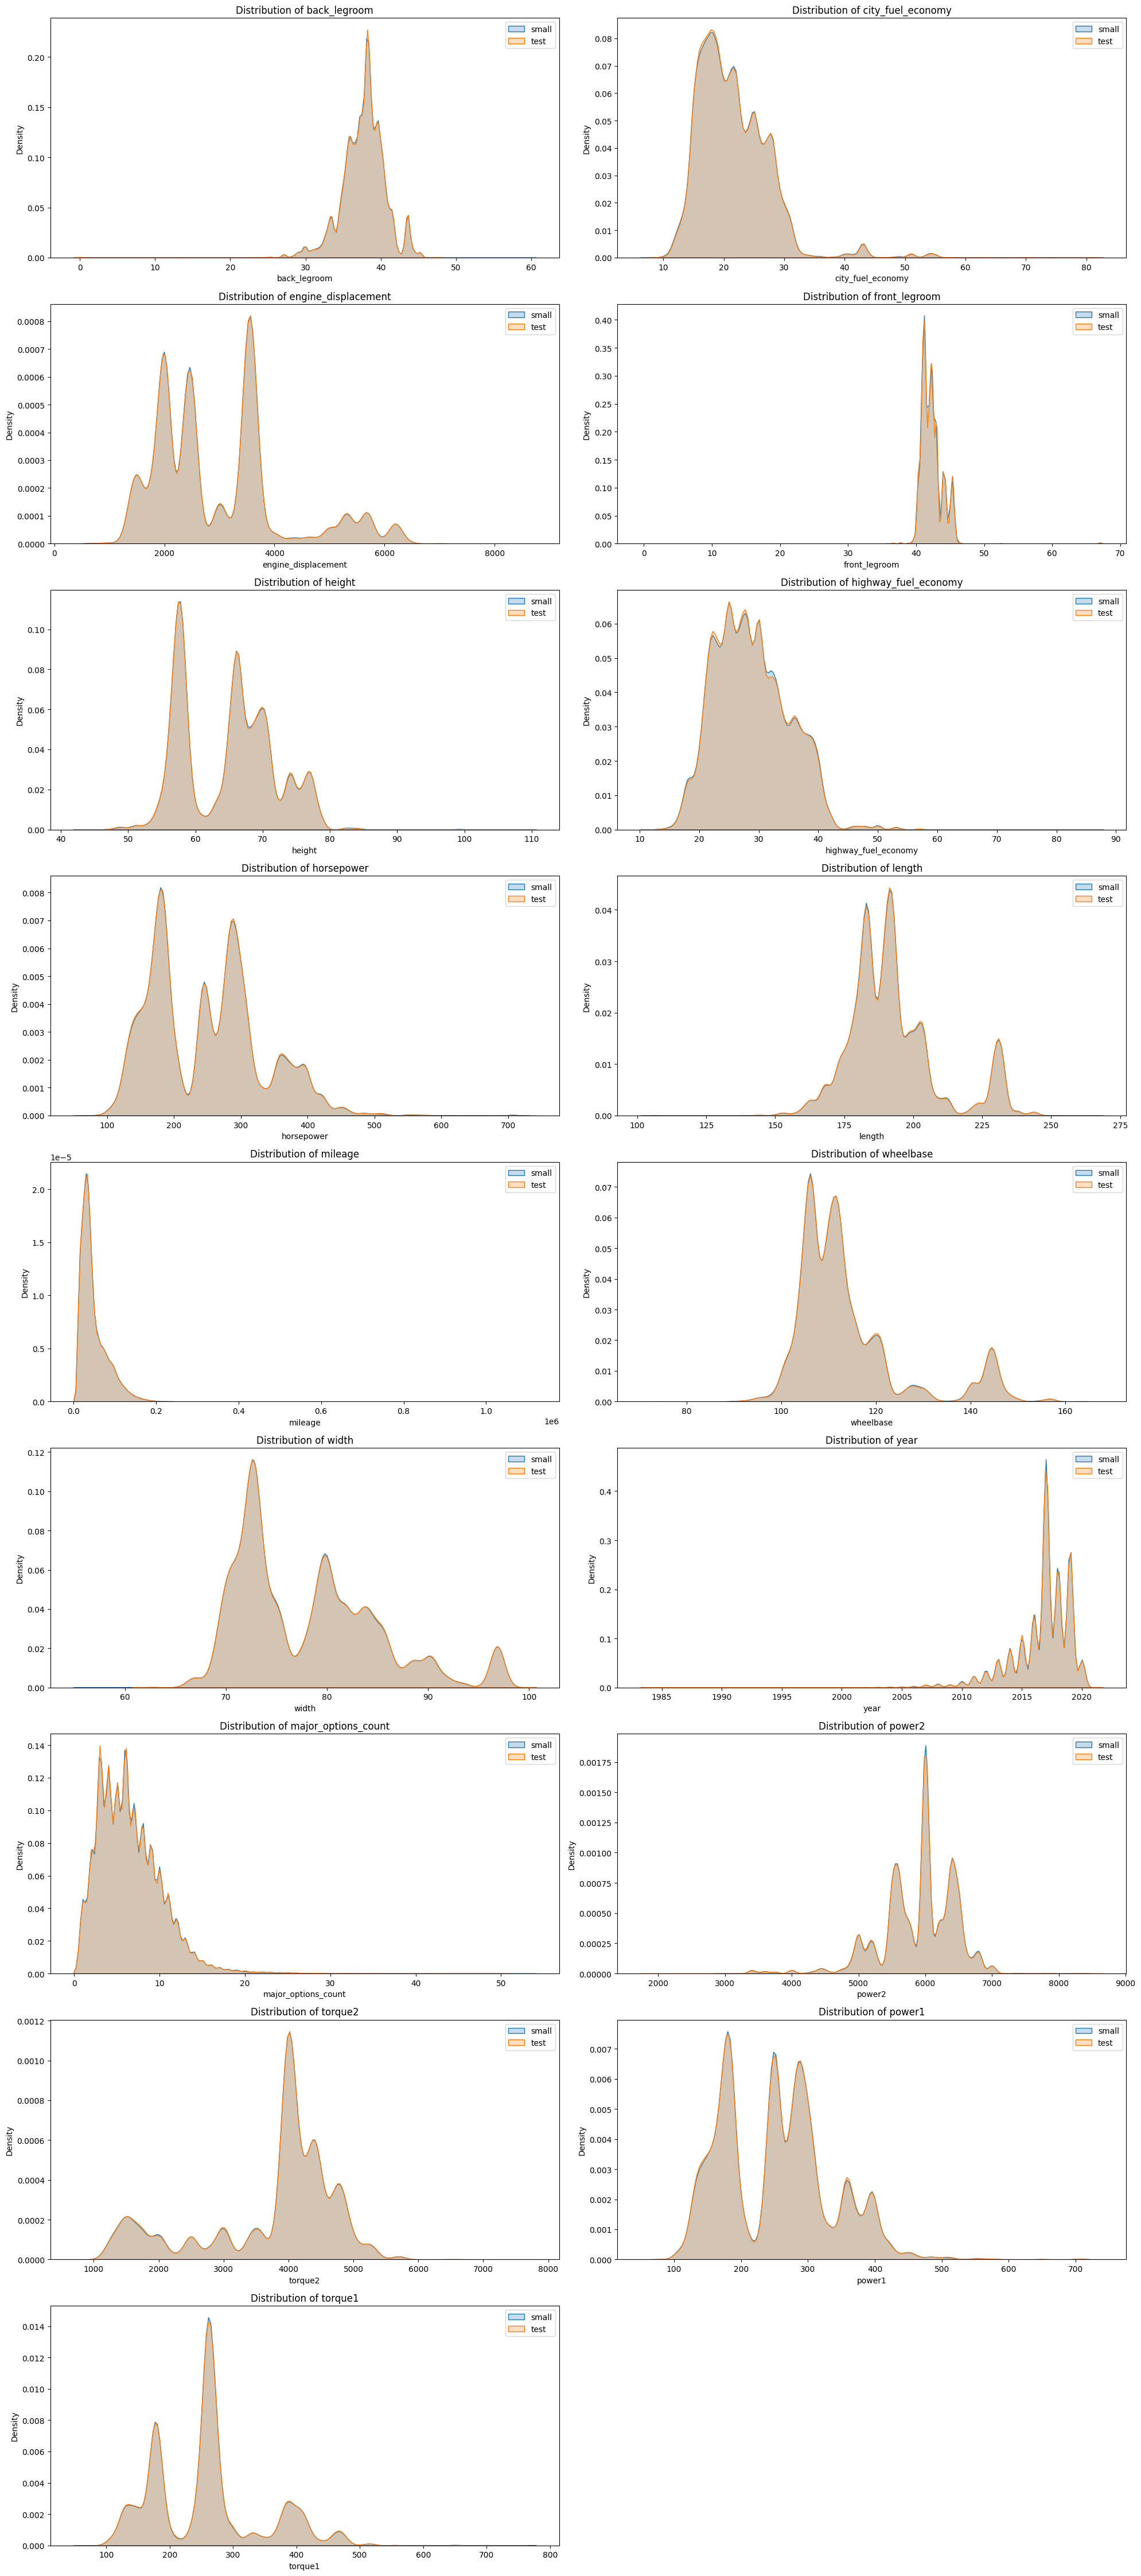

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to compare (excluding 'price')
columns = ['back_legroom', 'city_fuel_economy', 'engine_displacement', 'front_legroom', 'height',
           'highway_fuel_economy', 'horsepower', 'length', 'mileage', 'wheelbase', 'width', 'year',
           'major_options_count', 'power2', 'torque2', 'power1', 'torque1']

def plot_distributions(small_all, test_all, small_label, test_label):
    num_plots = len(columns)
    num_rows = (num_plots + 1) // 2  
    plt.figure(figsize=(20, 5 * num_rows))  # Adjust figure size
    
    for i, col in enumerate(columns, 1):
        plt.subplot(num_rows, 2, i)  # 2 columns now
        sns.kdeplot(small_all[col], label=small_label, fill=True, common_norm=False)
        sns.kdeplot(test_all[col], label=test_label, fill=True, common_norm=False)
        plt.title(f'Distribution of {col}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage (replace with your actual small_all and test_all DataFrames)
plot_distributions(small_all, test_all, 'small', 'test')

# Featuer Engineering


Feature Engineering Summary

Several new features were created to enhance the predictive power of the model. These include:
1. Average fuel economy calculated as the mean of city and highway fuel economy.
2. Interaction features such as horsepower multiplied by engine displacement and the total legroom by combining front and back legroom.
3. A volumetric feature created by multiplying the car's height, width, and length.
4. Categorical bucket columns for engine displacement, mileage, and horsepower were created to group continuous values into meaningful ranges.
5. Additional features such as the car's age and interaction ratios, like horsepower-to-engine displacement and fuel efficiency relative to engine displacement and mileage, were generated to capture more nuanced relationships within the data.

These engineered features were also applied to the test dataset to ensure consistency and improve model performance.



In [14]:

small_all['avg_fuel_economy'] = (small_all['city_fuel_economy'] + small_all['highway_fuel_economy']) / 2
small_all['hp_x_engine_displacement'] = small_all['horsepower'] * small_all['engine_displacement']
small_all['total_leg_room'] = small_all['back_legroom'] + small_all['front_legroom']
small_all['volumne'] = small_all['height'] * small_all['width']* small_all['length']
# Create engine displacement bucket column
bins1 = [0, 1000, 1700, 2400, 3100, 3800, 4500, 5200, 5900, 6600, 7300, 8000, np.inf]
labels1 = ['<1000', '1000-1700', '1700-2400', '2400-3100', '3100-3800', '3800-4500', '4500-5200', '5200-5900', '5900-6600', '6600-7300', '7300-8000', '8000+']
small_all['engine_displacement_bucket'] = pd.cut(small_all['engine_displacement'], bins=bins1, labels=labels1)

bins2 = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, np.inf]
labels2 = ['<10000', '10000-20000', '20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000', '90000-100000', '100000-110000', '110000+']
small_all['mileage_bucket'] = pd.cut(small_all['mileage'], bins=bins2, labels=labels2)
small_all['make_age'] = 2021 - small_all['year']
bins_hp = [0, 100, 150, 200, 250, 300, 350, 400, 450, 500, np.inf]
labels_hp = ['<100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500+']

# Convert engine displacement bucket to categorical
small_all['engine_displacement_bucket'] = small_all['engine_displacement_bucket'].astype('category')
small_all['mileage_bucket'] = small_all['mileage_bucket'].astype('category')
small_all['horsepower_bucket'] = pd.cut(small_all['horsepower'], bins=bins_hp, labels=labels_hp)

# Similar features for test
test_all['avg_fuel_economy'] = (test_all['city_fuel_economy'] + test_all['highway_fuel_economy']) / 2
test_all['hp_x_engine_displacement'] = test_all['horsepower'] * test_all['engine_displacement']
test_all['engine_displacement_bucket'] = pd.cut(test_all['engine_displacement'], bins=bins1, labels=labels1)
test_all['horsepower_bucket'] = pd.cut(test_all['horsepower'], bins=bins_hp, labels=labels_hp)
test_all['mileage_bucket'] = pd.cut(test_all['mileage'], bins=bins2, labels=labels2)
test_all['total_leg_room'] = small_all['back_legroom'] + small_all['front_legroom']
test_all['make_age'] = 2021 - test_all['year']
test_all['volumne'] = test_all['height'] * test_all['width']* test_all['length']

# Create interaction features for test_all
test_all['hp_ratio_engine_disp'] = test_all['horsepower'] / test_all['engine_displacement']
test_all['fuel_x_engine_disp'] = (test_all['city_fuel_economy'] + test_all['highway_fuel_economy']) / test_all['engine_displacement']
test_all['fuel_x_mileage'] = (test_all['city_fuel_economy'] + test_all['highway_fuel_economy']) / test_all['mileage']

# Create interaction features for small_all
small_all['hp_ratio_engine_disp'] = small_all['horsepower'] / small_all['engine_displacement']
small_all['fuel_x_engine_disp'] = (small_all['city_fuel_economy'] + small_all['highway_fuel_economy']) / small_all['engine_displacement']
small_all['fuel_x_mileage'] = (small_all['city_fuel_economy'] + small_all['highway_fuel_economy']) / small_all['mileage']


# Feature Importance on Small Sample

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Take a smaller sample for initial feature importance calculation
small_sample = small_all.sample(n=35000, random_state=42) 

# Separate features (X) and target (price)
X = small_sample.drop(['price'], axis=1)
y = small_sample['price']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Convert categorical columns to 'object' type (string)
X[categorical_cols] = X[categorical_cols].astype(str)

# Create preprocessing pipelines for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and fit the RandomForestRegressor with reduced number of trees and depth
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=30, max_depth=10, random_state=42, n_jobs=-1))
])

model.fit(X, y)

# Extract feature importances
feature_importances = model.named_steps['regressor'].feature_importances_

# Get feature names after one-hot encoding
categorical_feature_names = (
    model.named_steps['preprocessor']
    .transformers_[1][1]  # Access the categorical transformer
    .named_steps['onehot']
    .get_feature_names_out(categorical_cols)
)

# Combine numerical and categorical feature names
all_feature_names = np.hstack([numerical_cols, categorical_feature_names])

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the top 30 most important features
print(feature_importance_df.head(30))

                         feature  importance
6                     horsepower    0.463641
8                        mileage    0.217310
11                          year    0.032905
21                      make_age    0.029129
11410           wheel_system_FWD    0.026767
20                       volumne    0.025478
10                         width    0.022899
14                       torque2    0.022348
4                         height    0.014782
0                   back_legroom    0.012836
24                fuel_x_mileage    0.011593
22          hp_ratio_engine_disp    0.010663
16                       torque1    0.009322
15                        power1    0.008016
19                total_leg_room    0.006478
9                      wheelbase    0.004790
13                        power2    0.004673
8489              make_name_Ford    0.004589
7                         length    0.004316
18      hp_x_engine_displacement    0.004161
12           major_options_count    0.003805
8512      

# Model Building & Comparison Advance Models

In [16]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Custom scorer for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Select the important features
important_features = [
    'mileage', 'year', 'make_age', 'horsepower', 'hp_x_engine_displacement', 'total_leg_room', 'major_options_count',
    'avg_fuel_economy', 'wheel_system', 'torque2', 'engine_displacement', 'fuel_x_mileage',
    'hp_ratio_engine_disp', 'city_fuel_economy', 'torque1', 'power2', 'volumne', 'width', 'height', 'length',
    'highway_fuel_economy', 'back_legroom', 'front_legroom'
]

X = small_all[important_features]
y = small_all['price']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Convert categorical columns to 'object' type (string)
X[categorical_cols] = X[categorical_cols].astype(str)

# Create preprocessing pipelines for numerical and categorical data
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define regression models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.2, subsample=1.0, colsample_bytree=0.8, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=200, max_depth=20, learning_rate=0.2, subsample=1.0, colsample_bytree=0.8, random_state=42),
    'CatBoost': CatBoostRegressor(n_estimators=200, depth=6, learning_rate=0.2, subsample=1.0, random_state=42, verbose=0)
}

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate each model
for name, model in models.items():
    # Create pipeline with preprocessor and current model
    reg = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Perform cross-validation for MSE
    scores_mse = cross_val_score(reg, X, y, cv=cv, scoring=mse_scorer)
    scores_mse = -scores_mse  # Convert to positive since MSE is a negative scorer
    
    # Perform cross-validation for R-squared
    scores_r2 = cross_val_score(reg, X, y, cv=cv, scoring='r2')
    
    # Print results
    print(f"Model: {name}")
    print(f"MSE: {scores_mse.mean():.4f} (±{scores_mse.std():.4f})")
    print(f"R²: {scores_r2.mean():.4f} (±{scores_r2.std():.4f})")
    print("-----------------------------------------")

C:\Users\dell\AppData\Local\Temp\ipykernel_21008\2945055064.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_cols] = X[categorical_cols].astype(str)


Model: Random Forest
MSE: 6966953.5515 (±271712.2104)
R²: 0.9302 (±0.0028)
-----------------------------------------
Model: XGBoost
MSE: 6375851.2879 (±252020.6000)
R²: 0.9361 (±0.0028)
-----------------------------------------
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3300
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 27
[LightGBM] [Info] Start training from score 23173.828894
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > n

# Model Stacking

We have build the model with4 different advacned models. After evaluating their performance based on metrics like MSE and R-Sqaure we are further doing model stacking. This technique combines the predictions of multiple models into a meta-model, allowing me to leverage the strengths of each base model and improve overall performance.

We can enhance overall performance and achieve more robust predictions.


In [19]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

# Custom scorer for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Select the important features
important_features = [
    'mileage', 'year', 'make_age', 'horsepower', 'hp_x_engine_displacement', 'total_leg_room', 'major_options_count',
    'avg_fuel_economy', 'wheel_system', 'torque2', 'engine_displacement', 'fuel_x_mileage',
    'hp_ratio_engine_disp', 'city_fuel_economy', 'torque1', 'power2', 'volumne', 'width', 'height', 'length',
    'highway_fuel_economy', 'back_legroom', 'front_legroom'
]

X = small_all[important_features]
y = small_all['price']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Convert categorical columns to 'object' type (string)
X[categorical_cols] = X[categorical_cols].astype(str)

# Create preprocessing pipelines for numerical and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define base models
base_models = [
    ('xgb', XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.2, subsample=1.0, colsample_bytree=0.8, random_state=42)),
    ('lgbm', LGBMRegressor(n_estimators=200, max_depth=20, learning_rate=0.2, subsample=1.0, colsample_bytree=0.8, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)),
    ('catboost', CatBoostRegressor(n_estimators=200, depth=6, learning_rate=0.2, subsample=1.0, random_state=42, verbose=0))
]

# Define the meta-mode
meta_model = RidgeCV()

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Create the final pipeline
pipeline_stacking = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_regressor)
])

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
cv_scores_mse = cross_val_score(pipeline_stacking, X, y, cv=cv, scoring=mse_scorer, n_jobs=-1)
cv_scores_mse = -cv_scores_mse  # Convert to positive since MSE is a negative scorer
cv_scores_r2 = cross_val_score(pipeline_stacking, X, y, cv=cv, scoring='r2', n_jobs=-1)

# Print results
print(f"Cross-validated MSE scores: {cv_scores_mse}")
print(f"Mean MSE score: {cv_scores_mse.mean():.4f} (±{cv_scores_mse.std():.4f})")
print(f"Cross-validated R-squared scores: {cv_scores_r2}")
print(f"Mean R-squared score: {cv_scores_r2.mean():.4f} (±{cv_scores_r2.std():.4f})")

C:\Users\dell\AppData\Local\Temp\ipykernel_21008\494589918.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_cols] = X[categorical_cols].astype(str)


Cross-validated MSE scores: [6435616.5463947  5864020.76278788 6253410.71074094 5778431.93167559
 5937483.79855975]
Mean MSE score: 6053792.7500 (±249399.8802)
Cross-validated R-squared scores: [0.9348137  0.94033773 0.93784683 0.94243551 0.94142104]
Mean R-squared score: 0.9394 (±0.0027)


We applied model stacking, which improved the R-Square to 93.94%, reflecting a significant improvement in model performance. This R-Square value indicates a very strong fit of the model

# Graph of Actual vs Predicted Values

The following graph compares the actual prices with the predicted prices from our model. The close alignment between the two demonstrates the model's accuracy in predicting price values, further validating the model's performance improvement

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


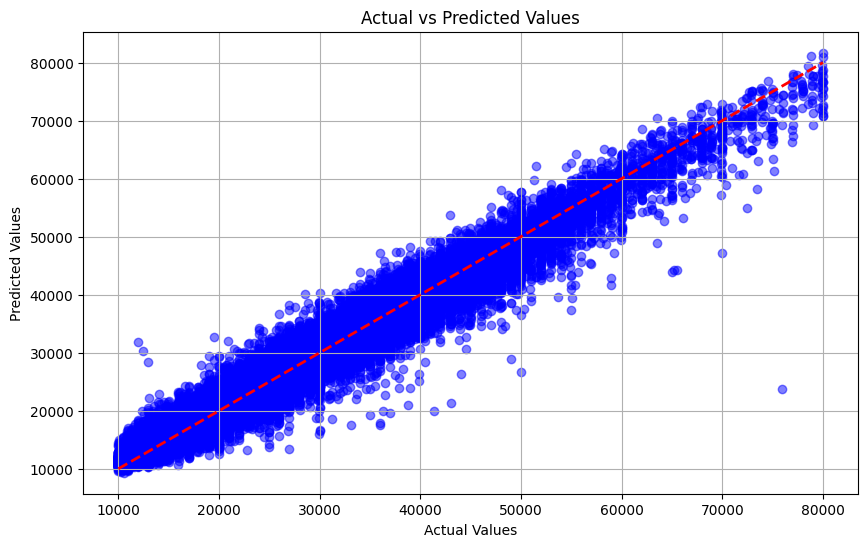

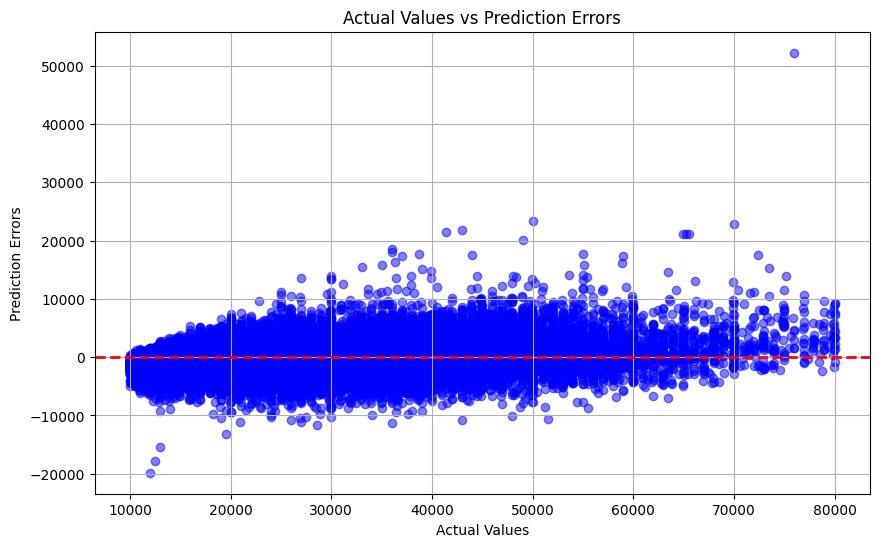

In [23]:
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Suppress warnings
warnings.filterwarnings('ignore')

# Fit the pipeline to the entire dataset
pipeline_stacking.fit(X, y)

# Make predictions on the entire dataset
y_pred = pipeline_stacking.predict(X)

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

# Calculate prediction errors
prediction_errors = y - y_pred

# Plot Actual Values vs Prediction Errors
plt.figure(figsize=(10, 6))
plt.scatter(y, prediction_errors, alpha=0.5, color='b')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Prediction Errors')
plt.title('Actual Values vs Prediction Errors')
plt.grid(True)
plt.show()


 After training, I plotted two graphs to visualize its performance:

The first graph shows actual vs predicted values. For car prices around 10,000, there are a few extreme errors where the model's predictions are off. As prices increase, we can see some outliers, indicating the model sometimes struggles with higher-priced cars. Interestingly, the predictions seem most concentrated and accurate in the mid-range of car prices, suggesting the model performs best for average-priced used cars.

The second graph displays prediction errors against actual values. It reinforces what we saw in the first plot - there's more variability in errors for both low-end and high-end car prices, while the mid-range shows more consistent predictions.

These visualizations highlight areas where our model excels and where it might need improvement, particularly in handling very cheap or expensive used cars.

In conclusion, our used car price prediction model demonstrates strong performance with an R-squared value of 94%. Through careful preprocessing and feature engineering, we've created a robust tool for estimating prices. While the model excels in the mid-range, there's room for improvement in predicting prices for very cheap and expensive cars. Overall, this model provides a solid foundation for pricing decisions in the used car market, with potential for further refinement to address specific market segments